# **Fake News Detection**
Fake News means incorporating information that leads people to the wrong paths. It can have real-world adverse effects that aim to intentionally deceive, gain attention, manipulate public opinion, or damage reputation. It is necessary to detect fake news mainly for media outlets to have the ability to attract viewers to their website to generate online advertising revenue.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import re
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Data Preprocessing

In [6]:
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

In [7]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [8]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [9]:
df_fake.shape,df_true.shape

((23481, 4), (21417, 4))

In [10]:
# Inserting a column "class" as target feature

df_fake["class"] = 0
df_true["class"] = 1

In [11]:
# Merging true and fake DataFrames

df = pd.concat([df_fake,df_true],axis = 0)
df.head(5)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [12]:
# checking Null values

df.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [13]:
# shuffling the data

df = df.sample(frac =1)

In [14]:
df.reset_index(inplace = True)
df.drop(['index'],axis=1,inplace= True)

In [15]:
df.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [16]:
df = df.drop(['title', 'subject', 'date'], axis=1)

In [17]:
df.head()

,text,class
0,"True to form, Trump and his campaign are royal...",0
1,NEW YORK (Reuters) - U.S. Republican Represent...,1
2,WASHINGTON (Reuters) - U.S. President Donald T...,1
3,WASHINGTON (Reuters) - President Donald Trump ...,1
4,"Monday on CNBC, former Gov. Jeb Bush (R-FL) sa...",0


<Axes: xlabel='class', ylabel='count'>

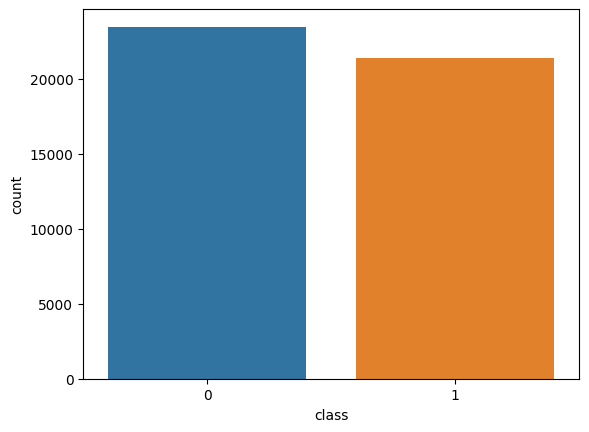

In [18]:
sns.countplot(data = df , x = 'class',order = df['class'].value_counts().index)

In [19]:
# Create a function to process the text

def remove_punctuations(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub('', '', text)
    text = re.sub("\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

    return text

In [ ]:
df['text'] = df['text'].apply(remove_punctuations)

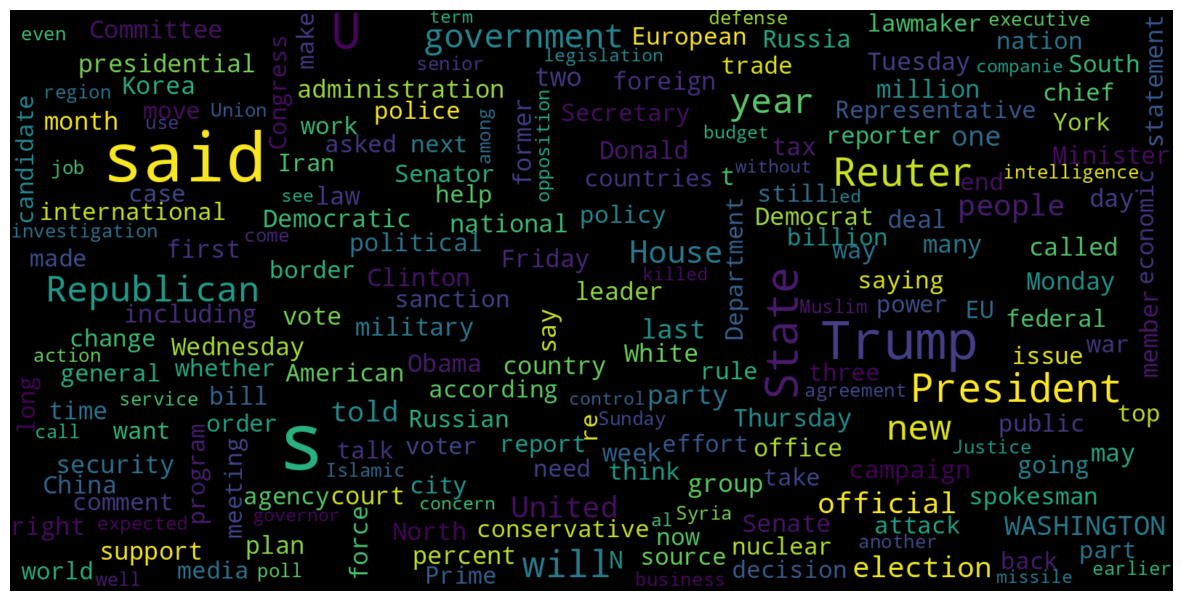

In [20]:
# word cloud for True news

consolidated = ' '.join(
    word for word in df['text'][df['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

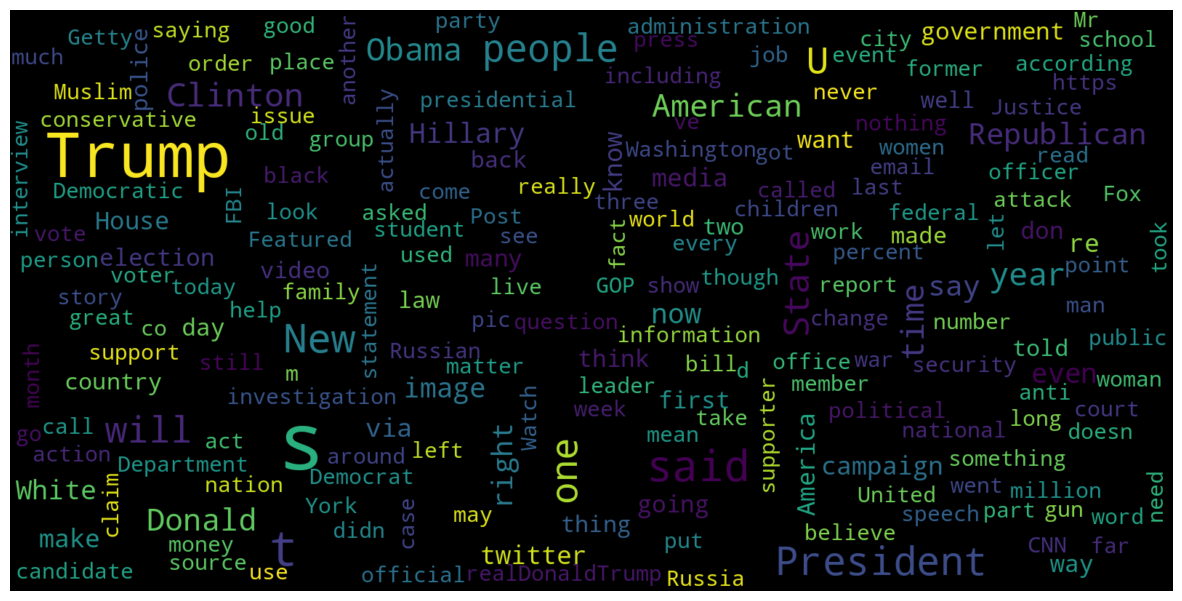

In [21]:
# word cloud for Fake News

consolidated = ' '.join(
    word for word in df['text'][df['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
x = df['text']
y = df['class']

In [24]:
# splitting Training and Testing data

In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=100)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(xtrain)
x_test = vectorization.transform(xtest)

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,ytrain)
y_pred = lr.predict(x_test)
print(accuracy_score(y_pred,ytest))
print(classification_report(y_pred,ytest))

0.986369710467706
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5802
           1       0.99      0.98      0.99      5423

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



***DecisionTree Classification***

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,ytrain)
y_pred = dt.predict(x_test)
print(accuracy_score(y_pred,ytest))
print(classification_report(y_pred,ytest))

0.9944766146993318
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5829
           1       0.99      0.99      0.99      5396

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



***Random Forest Classifier***

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,ytrain)
y_pred = rfc.predict(x_test)
print(accuracy_score(y_pred,ytest))
print(classification_report(y_pred,ytest))

0.9875278396436525
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5835
           1       0.99      0.99      0.99      5390

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [33]:
cm = confusion_matrix(ytest,y_pred)
cm

array([[5761,   66],
       [  74, 5324]])

Text(50.722222222222214, 0.5, 'Actual')

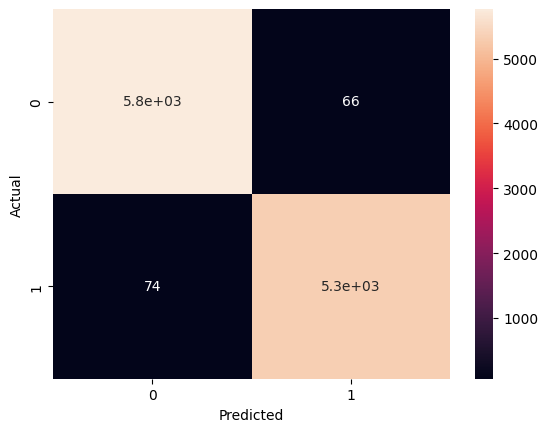

In [34]:
cm = confusion_matrix(ytest,y_pred)
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# **Conclution**
The task of classifying news manually requires in-depth knowledge of the domain and expertise to identify anomalies in the text. In this research, we discussed the problem of classifying fake news articles using machine learning models and ensemble techniques. The data we used in our work is collected from the World Wide Web and contains news articles from various domains to cover most of the news rather than specifically classifying political news. The primary aim of the research is to identify patterns in text that differentiate fake articles from true news. We extracted different textual features from the articles using an LIWC tool and used the feature set as an input to the models. The learning models were trained and parameter-tuned to obtain optimal accuracy. Some models have achieved comparatively higher accuracy than others. We used multiple performance metrics to compare the results for each algorithm. The ensemble learners have shown an overall better score on all performance metrics as compared to the individual learners.